In [1]:
import numpy as np

archivo = "../data/ch_normal_dist.dat"  # Reemplaza "ruta_del_archivo.txt" con la ruta real del archivo

numero = []
cgal_ch_2 = []
cgal_ch_graham = []
cpu_manhattan = []
cpu_euclidean = []
gpu_scan = []
cub_flagged = []
thrust_scan = []
thrust_copy = []


with open(archivo, "r") as f:
    lineas = f.readlines()

for linea in lineas:
    datos = linea.strip().split()
    
    if len(datos) >= 17:
        numero.append(datos[0])
        cgal_ch_2.append([float(d) for d in datos[1:6]])
        cgal_ch_graham.append([float(d) for d in datos[6:11]])
        cpu_manhattan.append([float(d) for d in datos[11:16]])
        cpu_euclidean.append([float(d) for d in datos[16:21]])
        gpu_scan.append([float(d) for d in datos[21:26]])
        cub_flagged.append([float(d) for d in datos[26:31]])
        thrust_scan.append([float(d) for d in datos[31:36]])
        thrust_copy.append([float(d) for d in datos[36:41]])


# Normal Distribution

In [32]:
import numpy as np
import matplotlib.pyplot as plt

archivo = "../data/ch_normal_dist.dat"  # Replace "ruta_del_archivo.txt" with the actual file path

numero = []
cgal_ch_2 = []
cgal_ch_graham = []
cpu_manhattan = []
cpu_euclidean = []
gpu_scan = []
cub_flagged = []
thrust_scan = []
thrust_copy = []

with open(archivo, "r") as f:
    lineas = f.readlines()

for linea in lineas:
    datos = linea.strip().split()

    if len(datos) >= 17:
        numero.append(int(datos[0]))
        cgal_ch_2.append(float(datos[1]))
        cgal_ch_graham.append(float(datos[6]))
        cpu_manhattan.append(float(datos[11]))
        cpu_euclidean.append(float(datos[16]))
        gpu_scan.append(float(datos[21]))
        cub_flagged.append(float(datos[26]))
        thrust_scan.append(float(datos[31]))
        thrust_copy.append(float(datos[36]))
        
ruta = "../data/ch_omp_euclidean_normal.dat"  # Reemplaza "ruta_del_archivo.txt" con la ruta real del archivo

with open(ruta, "r") as f:
    lineas = f.readlines()
    
omp_euclidean = []

for linea in lineas:
    datos = linea.strip().split()

    if len(datos) >= 6:
        #numero.append(int(datos[0]))
        omp_euclidean.append(float(datos[1]))
        
#print (omp_euclidean)

ruta2 = "../data/ch_omp_manhattan_normal.dat"  # Reemplaza "ruta_del_archivo.txt" con la ruta real del archivo

with open(ruta2, "r") as f:
    lineas = f.readlines()
    
omp_manhattan = []

for linea in lineas:
    datos = linea.strip().split()

    if len(datos) >= 6:
        #numero.append(int(datos[0]))
        omp_manhattan.append(float(datos[1]))
        

# Convert lists to numpy arrays for easier manipulation
numero = np.array(numero)
cgal_ch_2 = np.array(cgal_ch_2)
cgal_ch_graham = cgal_ch_2 / np.array(cgal_ch_graham)
cpu_manhattan = cgal_ch_2 / np.array(cpu_manhattan)
cpu_euclidean = cgal_ch_2 / np.array(cpu_euclidean)
gpu_scan = cgal_ch_2 / np.array(gpu_scan)
cub_flagged = cgal_ch_2 / np.array(cub_flagged)
thrust_scan = cgal_ch_2 / np.array(thrust_scan)
thrust_copy = cgal_ch_2 / np.array(thrust_copy)
omp_manhattan = cgal_ch_2 / np.array(omp_manhattan)
omp_euclidean = cgal_ch_2 / np.array(omp_euclidean)

# Create a dictionary to map the legend labels to their respective arrays
legend_labels = {
    'cgal_ch_2': cgal_ch_2,
    'cgal_ch_graham': cgal_ch_graham,
    'cpu_manhattan': cpu_manhattan,
    'cpu_euclidean': cpu_euclidean,
    'gpu_scan': gpu_scan,
    'cub_flagged': cub_flagged,
    'thrust_scan': thrust_scan,
    'thrust_copy': thrust_copy,
    'omp_euclidean' : omp_euclidean,
    'omp_manhattan' : omp_manhattan
}

# Create a dictionary to map the legend labels to their respective colors
color_mapping = {
    'cgal_ch_2': 'tab:blue',
    'cgal_ch_graham': 'tab:orange',
    'cpu_manhattan': 'tab:green',
    'cpu_euclidean': 'tab:red',
    'gpu_scan': 'tab:purple',
    'cub_flagged': 'tab:brown',
    'thrust_scan': 'tab:pink',
    'thrust_copy': 'tab:gray',
    'omp_euclidean' : 'tab:olive',
    'omp_manhattan' : 'tab:cyan'
}

# Define line styles and markers for better visualization in black and white
line_styles = ['-', '--', '-.', ':']
markers = ['o', 's', '^', 'D', 'v', 'p', '>', 'h']

# Sort the legend labels based on the maximum value in each array
sorted_labels = sorted(legend_labels, key=lambda x: np.max(legend_labels[x]), reverse=True)




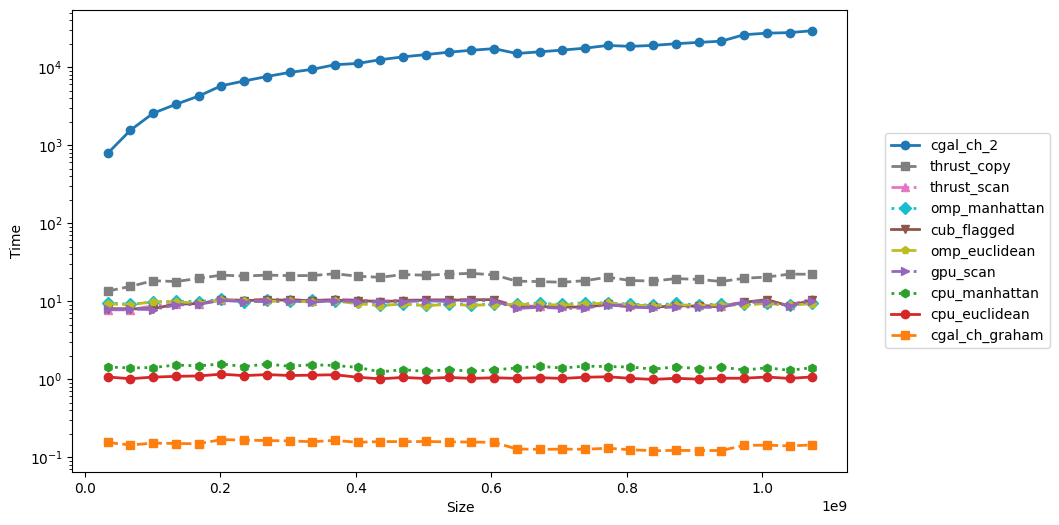

In [33]:
# Plot the arrays in the desired order with distinct line styles and markers
plt.figure(figsize=(10, 6))
for i, label in enumerate(sorted_labels):
    style_index = i % len(line_styles)
    marker_index = i % len(markers)
    plt.plot(numero, legend_labels[label], label=label, color=color_mapping[label], linewidth=2,
             linestyle=line_styles[style_index], marker=markers[marker_index])

plt.xlabel('Size')
plt.ylabel('Time')
plt.yscale('log')
plt.legend(bbox_to_anchor=(1.04, 0.5), loc="center left")
plt.show()

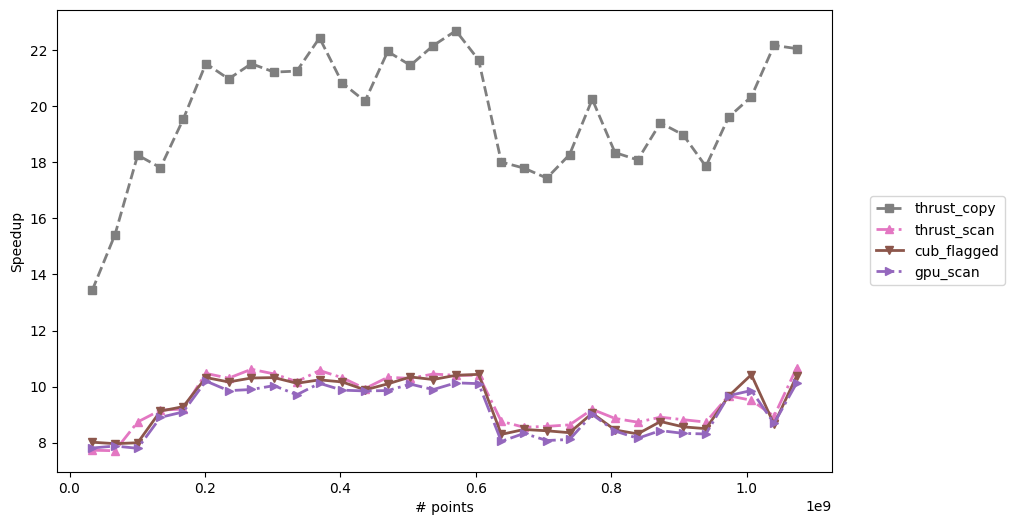

In [30]:
# Plot the arrays in the desired order with segmented lines and markers
plt.figure(figsize=(10, 6))
for i, label in enumerate(sorted_labels):
    style_index = i % len(line_styles)
    marker_index = i % len(markers)
    if label != 'omp_euclidean' and label != 'omp_manhattan' and label != 'cgal_ch_2' and label != 'cgal_ch_graham' and label != 'cpu_manhattan' and label != 'cpu_euclidean':
        plt.plot(numero, legend_labels[label], label=label, color=color_mapping[label], linewidth=2,
                linestyle=line_styles[style_index], marker=markers[marker_index])

plt.xlabel('# points')
plt.ylabel('Speedup')
#plt.yscale('log')
plt.legend(bbox_to_anchor=(1.04, 0.5), loc="center left")
plt.show()

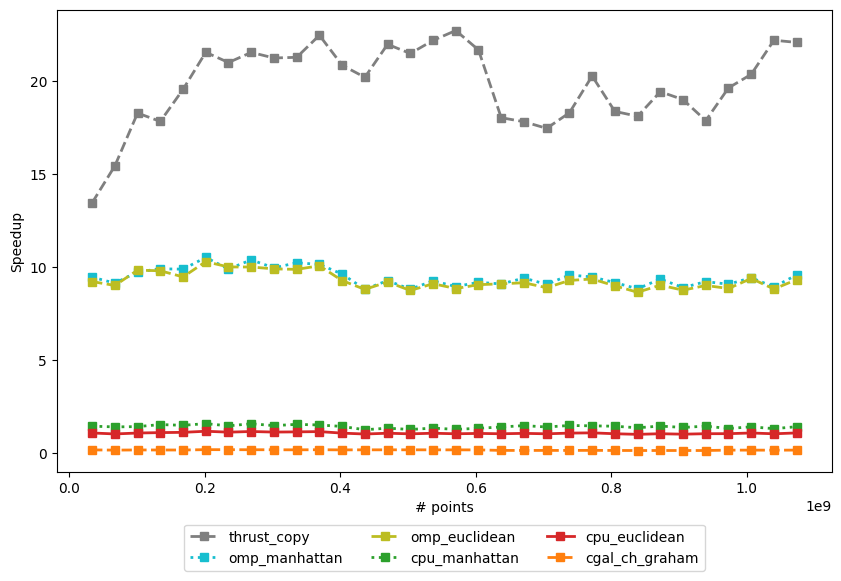

In [31]:
# Plot the arrays in the desired order with segmented lines and markers
plt.figure(figsize=(10, 6))
for i, label in enumerate(sorted_labels):
    style_index = i % len(line_styles)
    if label != 'cub_flagged' and label != 'thrust_scan' and label != 'gpu_scan' and label != 'cgal_ch_2':
        plt.plot(numero, legend_labels[label], label=label, color=color_mapping[label], linewidth=2,
                linestyle=line_styles[style_index], marker=markers[marker_index])

plt.xlabel('# points')
plt.ylabel('Speedup')
#plt.yscale('log')

# legend abajo de toda la figura
plt.legend(bbox_to_anchor=(0.5, -0.1), loc='upper center', ncol=3)

#plt.legend(bbox_to_anchor=(1.04, 0.5), loc="center left")
plt.show()

# Circumference Distribution

In [57]:
import numpy as np
import matplotlib.pyplot as plt

max_read = -4

archivo = "../data/ch_circumference_dist.dat"  # Replace "ruta_del_archivo.txt" with the actual file path

numero = []
cgal_ch_2 = []
cgal_ch_graham = []
cpu_manhattan = []
cpu_euclidean = []
gpu_scan = []
cub_flagged = []
thrust_scan = []
thrust_copy = []

with open(archivo, "r") as f:
    lineas = f.readlines()

for linea in lineas[:max_read]:
    datos = linea.strip().split()

    if len(datos) >= 17:
        numero.append(int(datos[0]))
        cgal_ch_2.append(float(datos[1]))
        cgal_ch_graham.append(float(datos[6]))
        cpu_manhattan.append(float(datos[11]))
        cpu_euclidean.append(float(datos[16]))
        gpu_scan.append(float(datos[21]))
        cub_flagged.append(float(datos[26]))
        thrust_scan.append(float(datos[31]))
        thrust_copy.append(float(datos[36]))
        
ruta = "../data/ch_omp_euclidean_sphere.dat"  # Reemplaza "ruta_del_archivo.txt" con la ruta real del archivo

with open(ruta, "r") as f:
    lineas = f.readlines()
    
omp_euclidean = []

for linea in lineas[:max_read]:
    datos = linea.strip().split()

    if len(datos) >= 6:
        #numero.append(int(datos[0]))
        omp_euclidean.append(float(datos[1]))
        
#print (omp_euclidean)

ruta2 = "../data/ch_omp_manhattan_sphere.dat"  # Reemplaza "ruta_del_archivo.txt" con la ruta real del archivo

with open(ruta2, "r") as f:
    lineas = f.readlines()
    
omp_manhattan = []

for linea in lineas[:max_read]:
    datos = linea.strip().split()

    if len(datos) >= 6:
        #numero.append(int(datos[0]))
        omp_manhattan.append(float(datos[1]))
        

# Convert lists to numpy arrays for easier manipulation
numero = np.array(numero)
cgal_ch_2 = np.array(cgal_ch_2)
cgal_ch_graham = cgal_ch_2 / np.array(cgal_ch_graham)
cpu_manhattan = cgal_ch_2 / np.array(cpu_manhattan)
cpu_euclidean = cgal_ch_2 / np.array(cpu_euclidean)
gpu_scan = cgal_ch_2 / np.array(gpu_scan)
cub_flagged = cgal_ch_2 / np.array(cub_flagged)
thrust_scan = cgal_ch_2 / np.array(thrust_scan)
thrust_copy = cgal_ch_2 / np.array(thrust_copy)
omp_manhattan = cgal_ch_2 / np.array(omp_manhattan)
omp_euclidean = cgal_ch_2 / np.array(omp_euclidean)

# Create a dictionary to map the legend labels to their respective arrays
legend_labels = {
    'cgal_ch_2': cgal_ch_2,
    'cgal_ch_graham': cgal_ch_graham,
    'cpu_manhattan': cpu_manhattan,
    'cpu_euclidean': cpu_euclidean,
    'gpu_scan': gpu_scan,
    'cub_flagged': cub_flagged,
    'thrust_scan': thrust_scan,
    'thrust_copy': thrust_copy,
    'omp_euclidean' : omp_euclidean,
    'omp_manhattan' : omp_manhattan
}

# Create a dictionary to map the legend labels to their respective colors
color_mapping = {
    'cgal_ch_2': 'tab:blue',
    'cgal_ch_graham': 'tab:orange',
    'cpu_manhattan': 'tab:green',
    'cpu_euclidean': 'tab:red',
    'gpu_scan': 'tab:purple',
    'cub_flagged': 'tab:brown',
    'thrust_scan': 'tab:pink',
    'thrust_copy': 'tab:gray',
    'omp_euclidean' : 'tab:olive',
    'omp_manhattan' : 'tab:cyan'
}

# Define line styles and markers for better visualization in black and white
line_styles = ['-', '--', '-.', ':']
markers = ['o', 's', '^', 'D', 'v', 'p', '>', 'h']

# Sort the legend labels based on the maximum value in each array
sorted_labels = sorted(legend_labels, key=lambda x: np.max(legend_labels[x]), reverse=True)



ValueError: operands could not be broadcast together with shapes (32,) (31,) 

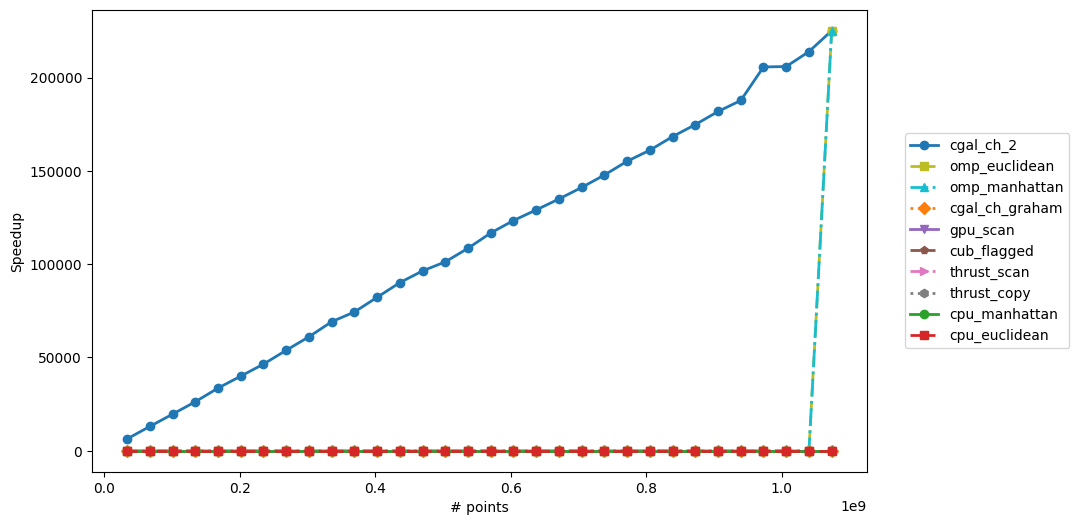

In [50]:
# Plot the arrays in the desired order with distinct line styles and markers
plt.figure(figsize=(10, 6))
for i, label in enumerate(sorted_labels):
    style_index = i % len(line_styles)
    marker_index = i % len(markers)
    plt.plot(numero, legend_labels[label], label=label, color=color_mapping[label], linewidth=2,
             linestyle=line_styles[style_index], marker=markers[marker_index])

plt.xlabel('# points')
plt.ylabel('Speedup')
#plt.yscale('log')
plt.legend(bbox_to_anchor=(1.04, 0.5), loc="center left")
plt.show()

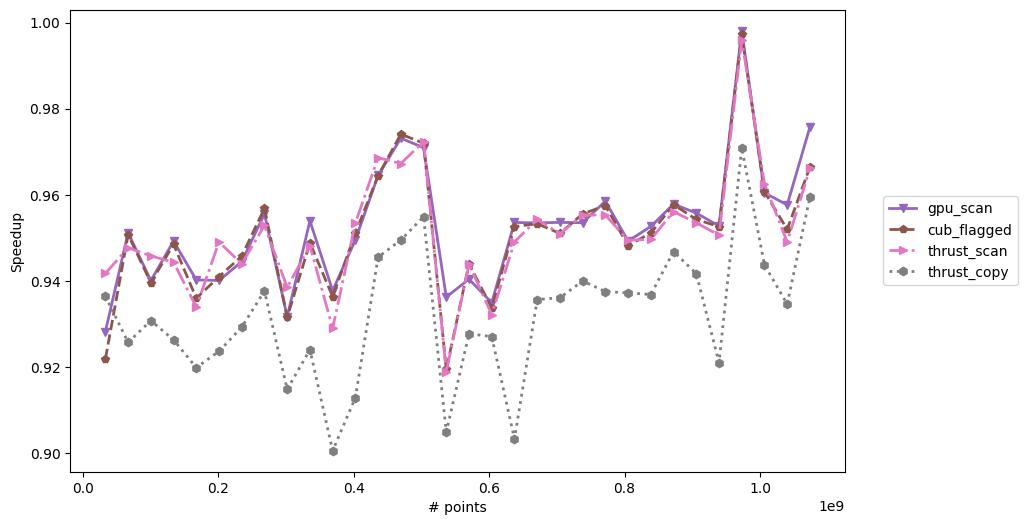

In [40]:
# Plot the arrays in the desired order with segmented lines and markers
plt.figure(figsize=(10, 6))
for i, label in enumerate(sorted_labels):
    style_index = i % len(line_styles)
    marker_index = i % len(markers)
    if label != 'omp_euclidean' and label != 'omp_manhattan' and label != 'cgal_ch_2' and label != 'cgal_ch_graham' and label != 'cpu_manhattan' and label != 'cpu_euclidean':
        plt.plot(numero, legend_labels[label], label=label, color=color_mapping[label], linewidth=2,
                linestyle=line_styles[style_index], marker=markers[marker_index])

plt.xlabel('# points')
plt.ylabel('Speedup')
#plt.yscale('log')
plt.legend(bbox_to_anchor=(1.04, 0.5), loc="center left")
plt.show()

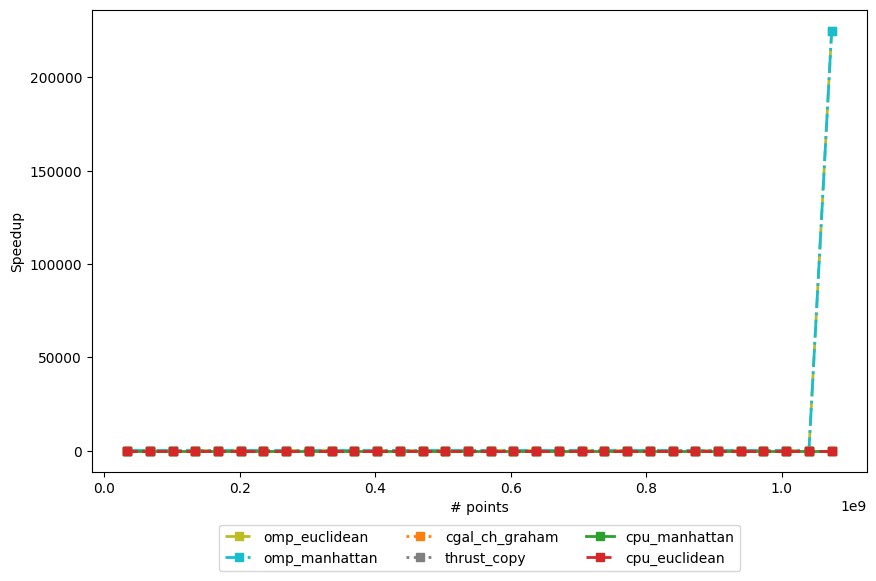

In [41]:
# Plot the arrays in the desired order with segmented lines and markers
plt.figure(figsize=(10, 6))
for i, label in enumerate(sorted_labels):
    style_index = i % len(line_styles)
    if label != 'cub_flagged' and label != 'thrust_scan' and label != 'gpu_scan' and label != 'cgal_ch_2':
        plt.plot(numero, legend_labels[label], label=label, color=color_mapping[label], linewidth=2,
                linestyle=line_styles[style_index], marker=markers[marker_index])

plt.xlabel('# points')
plt.ylabel('Speedup')
#plt.yscale('log')

# legend abajo de toda la figura
plt.legend(bbox_to_anchor=(0.5, -0.1), loc='upper center', ncol=3)

#plt.legend(bbox_to_anchor=(1.04, 0.5), loc="center left")
plt.show()